In [4]:
ls

drive/  sample_data/


In [5]:

cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [6]:
ls

 AktivasyonFonk.ipynb
 Aktivasyon_Fonk_karşılaştırma.ipynb
 ArcFace/
 Colab_CalismaOrtami.ipynb
'Consumer Segmentation using K-Means Clusterng  Algorithim.ipynb'
 Duygu_Tanima/
 DuyguTanima.ipynb
 EvrisimliSinirAgı_AdimAdim.ipynb
 Fashion-MNIST-CNN-.ipynb
 heart_disease_data.csv
'Heart Disease Prediction.ipynb'
 IMAGENET-ResNet50-NesneTanıma.ipynb
 images/
'Katmanlar ve Modeller.ipynb'
 Mall_Customers.csv
 MNIST_YSA.ipynb
 save_models/
 Untitled0.ipynb
'Vektör Matris Tensör.ipynb'
 VGG16.Nesne_Tanıma.ipynb
 YüzTanima.ipynb


In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential, model_from_json, Model
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization

from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint



In [8]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=3cb94dfac54530c151f733552ef673e2d1f299ff9fcc8d342e8cf569d4526544
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [9]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/fer2013/fer2013.csv')

In [10]:
data.shape

(35887, 3)

In [11]:
data.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [12]:
data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

## EĞİTİM VERİSİ İÇİN ÖN İŞLEME ADIMLARI

In [13]:
np.unique(data['Usage'].values.ravel())
print('Eğitim setindenki örnek sayısı: %d'  %(len(data[data.Usage == 'Training'])))

Eğitim setindenki örnek sayısı: 28709


In [14]:
train_data = data[data.Usage == 'Training']

In [15]:
#eğitim örnekleri bize yanyana verildiği için boşluklardan parse ederek liste halinde değişkene almak
train_pixels= train_data.pixels.str.split(' ').to_list()
train_pixels = pd.DataFrame(train_pixels, dtype = int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)

print(train_images)
print(train_images.shape)

<ipython-input-15-26a477ea2ed4>:3: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  train_pixels = pd.DataFrame(train_pixels, dtype = int)


[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


<ipython-input-15-26a477ea2ed4>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_images = train_images.astype(np.float)


In [16]:
def show(img):  #görüntüyü 48x48 boyutlarına çevireceğiz
  show_image = img.reshape(48,48)
  plt.axis('off')
  plt.imshow(show_image, cmap='gray')

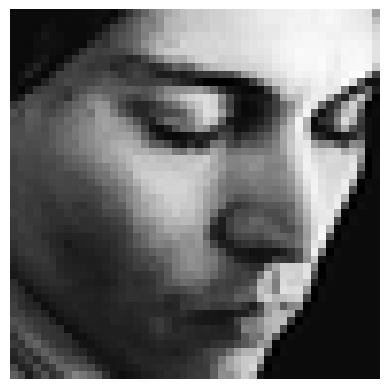

In [17]:
show(train_images[15649])

**Eğitim kümesinde kaç sınıf olduğunu görelim**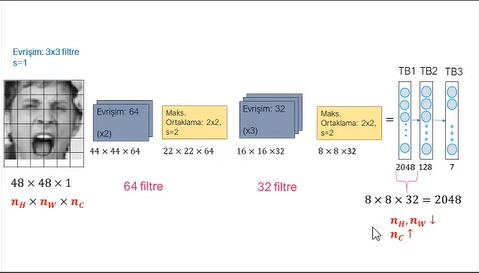

In [18]:
train_labels_flat = train_data['emotion'].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print('farklı yüz ifadelerinin sayısı: %d'%train_labels_count)

farklı yüz ifadelerinin sayısı: 7


**One Hot ile eğitim kümesindeki verilerin her birine düşen sınıfı yani eğitim işlemi boyutunu görelim**

In [19]:
def dense_to_one_hot(labels_dense, num_classes):
  num_labels = labels_dense.shape[0]
  index_offset = np.arange(num_labels) * num_classes
  labels_one_hot = np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot



In [20]:
y_train = dense_to_one_hot(train_labels_flat, train_labels_count)
y_train = y_train.astype(np.uint8)

print(y_train.shape)


(28709, 7)


# TEST VERİSİ ÖN İŞLEME ADIMLARI

In [21]:
np.unique(data["Usage"].values.ravel())
print('Test setindenki örnek sayısı: %d'%(len(data[data.Usage == 'PublicTest' ])))

Test setindenki örnek sayısı: 3589


In [22]:
#test örnekleri bize yanyana verildiği için boşluklardan parse ederek liste halinde değişkene almak
test_data = data[data.Usage == 'PublicTest']
test_pixels= test_data.pixels.str.split(' ').to_list()
test_pixels = pd.DataFrame(test_pixels, dtype = int)
test_images = test_pixels.values
test_images = test_images.astype(np.float)

print(test_images)
print(test_images.shape)

<ipython-input-22-61757fc5d96a>:4: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  test_pixels = pd.DataFrame(test_pixels, dtype = int)


[[254. 254. 254. ...  42. 129. 180.]
 [156. 184. 198. ... 172. 167. 161.]
 [ 69. 118.  61. ...  88.  87.  90.]
 ...
 [255. 255. 255. ...  48.  50.  46.]
 [ 33.  25.  31. ...   4.   5.   4.]
 [ 61.  63.  59. ... 113. 165. 180.]]
(3589, 2304)


<ipython-input-22-61757fc5d96a>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_images = test_images.astype(np.float)


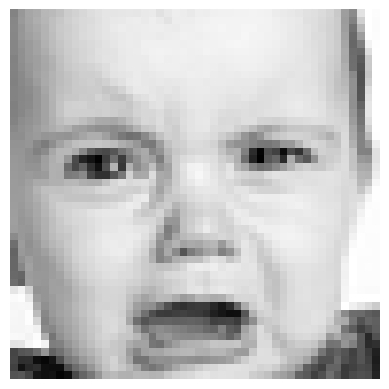

In [23]:
show(test_images[156])

**One Hot ile test kümesindeki verilerin her birine düşen sınıfı yani eğitim işlemi boyutunu görelim**

In [24]:
test_labels_flat = test_data['emotion'].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]
print('farklı yüz ifadelerinin sayısı: %d'%test_labels_count)


y_test = dense_to_one_hot(test_labels_flat, test_labels_count)
y_test = y_test.astype(np.uint8)

print(y_test.shape)



farklı yüz ifadelerinin sayısı: 7
(3589, 7)


# TEST KÜMESİNDEN ÖRNEK GÖRÜNTÜLER

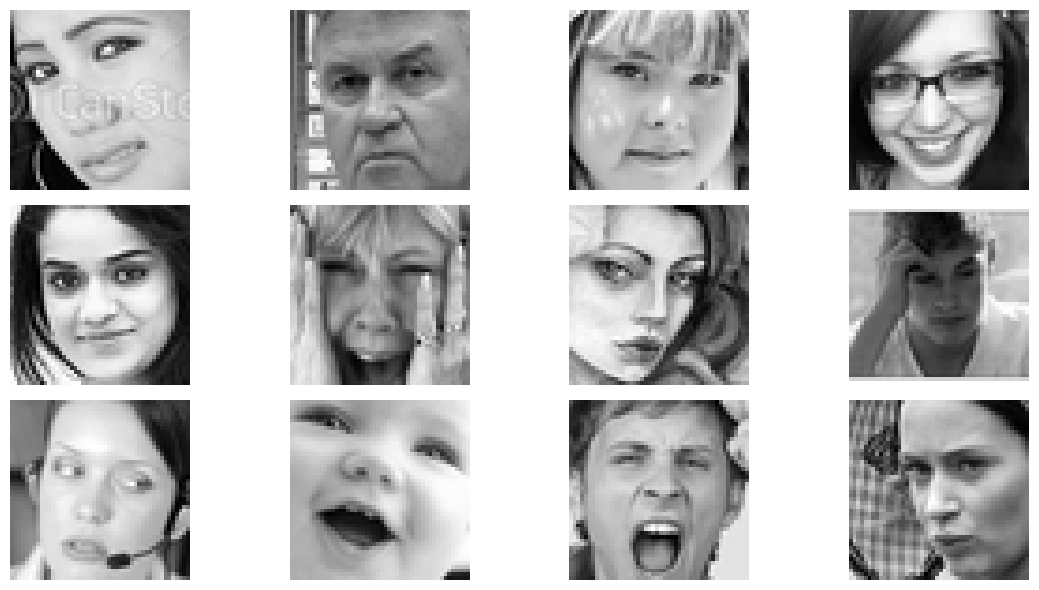

In [25]:
plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3, 4, i)
  plt.axis('off')

  image = test_images[i].reshape(48,48)
  plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

## DERİN EVRİŞİMLİ SİNİR AĞI MODELİ TAINMLANMASI

In [26]:


model = Sequential()

#1.KATMAN
model.add(Conv2D(64, 3, data_format = 'channels_last', kernel_initializer='he_normal', input_shape=(48,48,1)))     #2boyutlu convolüsyon katman, 64 yükseklik, 3 genişlik, kanal bilgisi yer alacak, input shape giriş verisi ölçüleri 48,48,1 olarak bilinmektedir.
model.add(BatchNormalization())
model.add(Activation('relu'))

#2.KATMAN
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2), strides =2))  #pool size kaça kaç pikselde hareket edecek? strides atlanan adım sayısını ifade eder. 2şer atlayarak tarama işlemi gerçekleşecek.
model.add(Dropout(0.6)) #%60 unutma işlemi, nöron silme

#3.KATMAN
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

#4.KATMAN
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5.KATMAN
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2), strides =2))  #pool size kaça kaç pikselde hareket edecek? strides atlanan adım sayısını ifade eder. 2şer atlayarak tarama işlemi gerçekleşecek.
model.add(Dropout(0.6)) #%60 unutma işlemi, nöron silme

#TAM BAĞLANTI KATMANI
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6)) #%60 unutma işlemi, nöron silme

#ÇIKIŞ KATMANI
model.add(Dense(7))
model.add(Activation('softmax')) #sınıflandırma işlemi 7 duygu sınıfı var
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #optimizasyon ve başarım hesaplama metriklerinin belirlenmesi
#model özetini görselleştirelim

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 46, 46, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 44, 44, 64)        256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 44, 44, 64)        0

**Eğitim ve test kümelerinin eleman sayısı, yükseklik ve genişlik katsayı bilgilerini ekrana yazdıralım**

In [27]:
x_train = train_images.reshape(-1,48,48,1)
x_test = test_images.reshape(-1,48,48,1)

print('Train:', x_train.shape)   #çıktı verisi, eleman sayısı, yükseklik, genişlik ve kanal sayısını ifade ediyor
print('Test:', x_test.shape)

Train: (28709, 48, 48, 1)
Test: (3589, 48, 48, 1)


**Eğitim ve test kümelerinin eleman ve duygu sınıf sayısı**

In [28]:
print('Train:', y_train.shape)
print('Test:', y_test.shape)

Train: (28709, 7)
Test: (3589, 7)


**Eğitim işleminin gerçekleşmesini istediğimiz epoch, batchsize gibi değerlerin belirlenmesi ve eğitim sonucunda ağırlıkların .h5 dosyası olarak kaydedilmesi**

In [29]:
checkpointer = ModelCheckpoint(filepath ='/content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/fer2013/face_model.h5', verbose =1, save_best_only = True)

epochs = 10
batchSize = 100

hist = model.fit(x_train, y_train, epochs=epochs, shuffle=True, batch_size = batchSize, validation_data= (x_test, y_test), callbacks=[checkpointer], verbose=2) #modeli çalıştıracak

#save model to json
model_json = model.to_json()
with open('/content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/fer2013/face_model.json', 'w') as json_file:
  json_file.write(model_json)


Epoch 1/10

Epoch 1: val_loss improved from inf to 1.65928, saving model to /content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/fer2013/face_model.h5
288/288 - 23s - loss: 2.0449 - accuracy: 0.2381 - val_loss: 1.6593 - val_accuracy: 0.3477 - 23s/epoch - 79ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.65928 to 1.54430, saving model to /content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/fer2013/face_model.h5
288/288 - 11s - loss: 1.6734 - accuracy: 0.3433 - val_loss: 1.5443 - val_accuracy: 0.4082 - 11s/epoch - 40ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.54430 to 1.42370, saving model to /content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/fer2013/face_model.h5
288/288 - 11s - loss: 1.5551 - accuracy: 0.3934 - val_loss: 1.4237 - val_accuracy: 0.4561 - 11s/epoch - 40ms/step
Epoch 4/10

Epoch 4: val_loss improved from 1.42370 to 1.37177, saving model to /content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/fer2013/face_model.h5
288/288 - 12s - loss: 1.4617 - accuracy: 0.4321 - val_loss: 1.3718 - val_accuracy: 0.4712 - 12s/epoch - 41ms/step
Epoch 5/10

Epoch 5: val_loss improved from 1.37177 to 1.30369, saving model to /content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/fer2013/face_model.h5
288/288 - 11s - loss: 1.4067 - accuracy: 0.4555 - val

**Eğitim sonucu elde edilen Eğitim ve Geçerleme(Validation) sonuçlarının grafiksel olarak gösterimi**

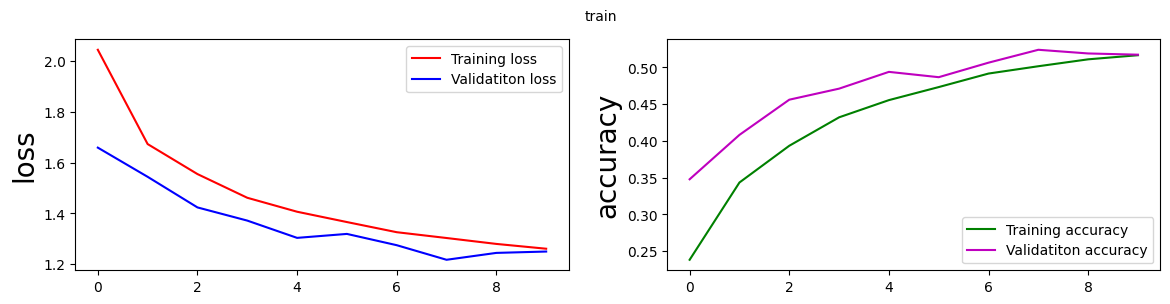

In [30]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.suptitle('train', fontsize=10)
plt.ylabel('loss', fontsize=20)
plt.plot(hist.history['loss'], color='r', label='Training loss')
plt.plot(hist.history['val_loss'], color='b', label='Validatiton loss')
plt.legend(loc = 'upper right')


plt.subplot(1,2,2)
plt.ylabel('accuracy', fontsize=20)
plt.plot(hist.history['accuracy'], color='g', label='Training accuracy')
plt.plot(hist.history['val_accuracy'], color='m', label='Validatiton accuracy')
plt.legend(loc = 'lower right')


plt.show()


In [31]:
test = data[['emotion', 'pixels']][data['Usage']== 'PrivateTest']
test['pixels'] = test['pixels'].apply(lambda im:np.fromstring(im, sep=' '))
test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [32]:
x_test_private=np.vstack(test['pixels'].values)
y_test_private=np.array(test["emotion"])

In [33]:
from tensorflow.python.keras.utils import np_utils

x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [34]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("PrivateTest üzerindeki doğruluk durumu:", score)

PrivateTest üzerindeki doğruluk durumu: [1.2344642877578735, 0.5218724012374878]


## Farklı görüntülerle test işlemlerini yapıp sonuçlarını görselleştirelim

In [38]:
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import os

In [39]:
model_best = load_model("/content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/fer2013/face_model.h5")

In [40]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/images")

In [41]:
ls

brando.png  hababam.jpg        javierbardem.jpg  robertdeniro.jpg
emojis/     javierbardem2.jpg  kemal_sunal2.jpg


In [52]:
image_path = ("/content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/images/kemal_sunal2.jpg")

test_image_original = image.load_img(image_path) #orjinal renkli görüntü
test_image = image.load_img(image_path, target_size=(48,48), grayscale = True)
test_data = image.img_to_array(test_image)
test_data = np.expand_dims(test_data, axis=0)
test_data = np.vstack([test_data])

results= model_best.predict(test_data, batch_size=1)

1/1 [==============================] - 0s 17ms/step


## SONUÇLARIN GÖRSELLEŞTİRİLMESİ ADIMLARI

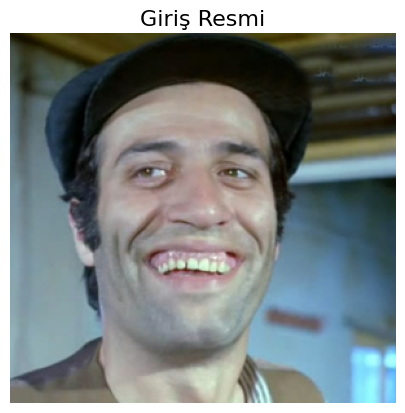

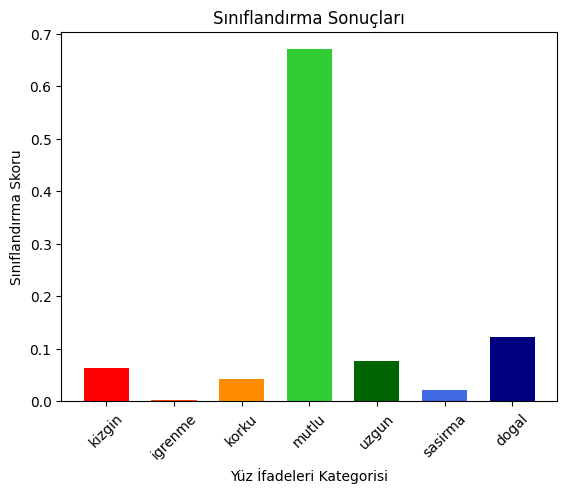

Sınıflandırma Sonucu En Yüksek Oranla: mutlu


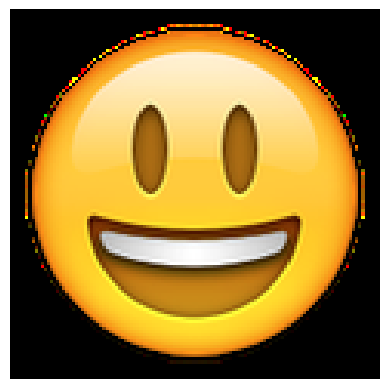

In [53]:
class_names = ['kizgin', 'igrenme', 'korku', 'mutlu', 'uzgun', 'sasirma', 'dogal']
ind = 0.1+0.6*np.arange(len(class_names))
width= 0.4 #bar genişliği
color_list = ['red', 'orangered' ,'darkorange', 'limegreen', 'darkgreen', 'royalblue', 'navy']

#test resmini ekrana çizdirelim
plt.imshow(test_image_original)
plt.title('Giriş Resmi', fontsize=16)
plt.axis('off')
plt.show()

#sonuçları renklendirelim
for i in range(len(class_names)):
  plt.bar(ind[i], results[0][i], width, color=color_list[i])
plt.title('Sınıflandırma Sonuçları')
plt.xlabel('Yüz İfadeleri Kategorisi')
plt.ylabel('Sınıflandırma Skoru')
plt.xticks(ind, class_names, rotation=45)
plt.show()

print("Sınıflandırma Sonucu En Yüksek Oranla:", class_names[np.argmax(results)])

#en yüksek duyguya karşılık gelen emojinin çizilmesi

emoji_img = image.load_img("/content/drive/MyDrive/Colab Notebooks/Duygu_Tanima/images/emojis/%s.png"% str(class_names[np.argmax(results)]))
plt.imshow(emoji_img)
plt.axis('off')
plt.show()

